## Homework 5: Dynamic Programming Nucleotide Alignment Tool with Numpy and Banded Alignment

### Setup:
In this two-part assignment, you will develop a dynamic programming (Needleman Wunsch) alignment tool using the Numpy library in Python specifically for nucleotide sequences. The first part will involve implementing a standard Needleman-Wunsch alignment algorithm. The second part will involve modifying your alignment algorithm to implement banded alignment, which restricts the search space to speed up the alignment process.

### Needleman-Wunsch (5 points)

#### 1.1. Input:

Create a Python function that accepts two input sequences (strings) of nucleotides (A, T, C, G) and scoring parameters for match, mismatch, and gap costs.
Ensure the input sequences are valid (i.e., only contain valid nucleotide characters).

#### 1.2. Alignment Algorithm:

Implement a dynamic programming algorithm for global (Needleman-Wunsch) alignment using the given scoring parameters for match, mismatch, and gap costs.
Utilize Numpy to create and manipulate scoring and **return the score of the full alignment** (lower righthand entry in the matrix). We won't be implementing
a traceback procedure here to get the aligned sequences like we will talk about in class on Thursday, just return the score.

##### Some hints

First, you're matrix needs to be one greater than the length of your input strings in each dimension (we've provided this). You can then assign
scores to individual matrix positions in a Numpy matrix using the ```scoring_matrix[x, y] = value``` syntax. You then need to fill in the first column and row with the cost of starting a gap in one sequence (with increasing length). Then you'll 
need to fill in each cell of the matrix (starting at position [1,1]) with the recurrence relationship we talked about in class, with the provided
match, mismatch, and gap costs values, considering the sequence bases at your column and row. Remember we've used the first row and column (0) to
be an initial gap, so be careful how you offset into your input strings (what base in seq1 corresponds to column 1?).

In [16]:
import numpy as np

def needleman_wunsch(seq1, seq2, match, mismatch, gap_cost):
    # Initialize scoring and traceback matrices
    n, m = len(seq1), len(seq2)
    scoring_matrix = np.zeros((n + 1, m + 1), dtype=int)
    
    # your stuff here
    
    return scoring_matrix[n, m]


#### Test case

You can find a number of good examples online to test out your code. I've pulled one example from [here](http://www.cs.toronto.edu/~brudno/csc2427/Lec7Notes.pdf). Sadly though their alignment matrix is wrong, and we'll need to make our own. They perform an alignment using sequences:

ACTGATTCA

and 

ACGCATCA

And we/they should get the resulting scoring matrix:

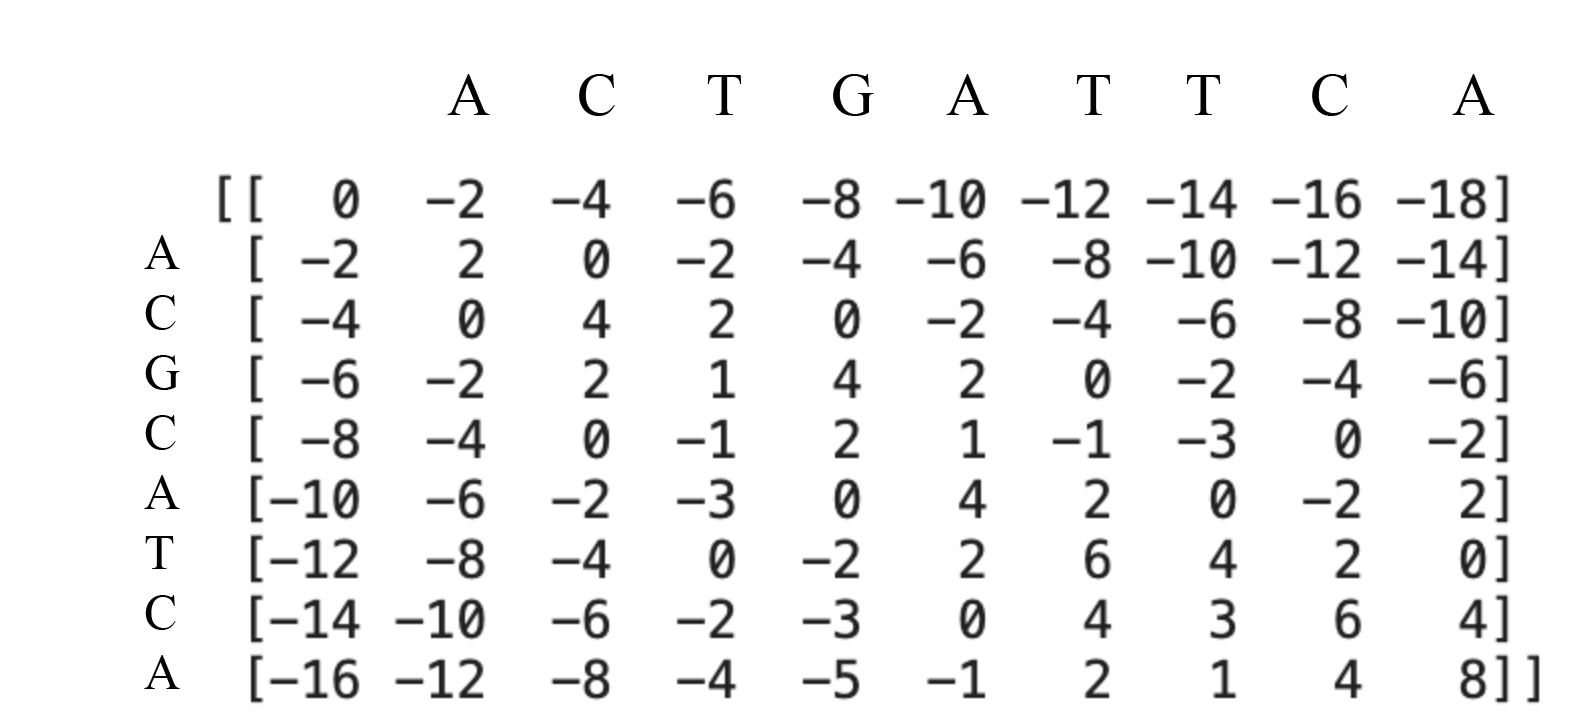

Using a match score of 2, a mismatch cost of -3, and a gap cost of -2. You can use this to test your code, a simple ```print(scoring_matrix)``` in your alignment function will let you see the matrix you've created (please remove this when your done, as we don't want to see it in grading!). You can also see where their updates went wrong. Gabe the scribe messed up a few cells in their write-up.

In [ ]:
match = 2
mismatch = -3
gap_cost = -2

my_answer = needleman_wunsch('ACGCATCA','ACTGATTCA',match,mismatch,gap_cost)

print(my_answer)


#### Some test setup

To help you test out your code, you may want to create some test sequences at random with some changes that we'll try to detect. Here's some helper code:

In [3]:
import random

def mutate_base(base):
    """
    Return a randomly chosen different nucleotide from the given base.
    
    Args:
    base (str): A single nucleotide ('A', 'C', 'G', or 'T')
    
    Returns:
    str: A different nucleotide from the input base
    """
    bases = {'A', 'C', 'G', 'T'}
    bases.remove(base)
    return random.choice(list(bases))

def generate_sequences(length, homology):
    """
    Generate two sequences of the given length with the specified homology.
    
    Args:
    length (int): The length of the sequences to be generated
    homology (float): A value between 0 and 1 representing the proportion of identical positions in the sequences
    
    Returns:
    tuple: A tuple containing two sequences (str) with the specified homology
    """
    nucleotides = ['A', 'C', 'G', 'T']
    seq1 = ''.join(random.choices(nucleotides, k=length))
    mutations = int(length * (1 - homology))

    positions = random.sample(range(length), mutations)
    seq2 = list(seq1)

    for pos in positions:
        seq2[pos] = mutate_base(seq2[pos])

    return seq1, ''.join(seq2)


def delete_random_segment(s,length):
    """
    Delete a random segment from an input string.
    
    Args:
    s (str): The input string
    
    Returns:
    str: The modified string with a random range deleted
    """
    if len(s) <= 1:
        return s

    start = random.randint(0, len(s) - length)
    end = min(start + length, len(s))
    
    return s[:start] + s[end:]

length = 50
homology = 0.3

seq1, seq2 = generate_sequences(length, homology)
seq1 = delete_random_segment(seq1,10)
print("Sequence 1:", seq1)
print("Sequence 2:", seq2)


Sequence 1: GGTACTGCACCCACTAACACTAGAACTAATTGGGATGAGC
Sequence 2: GCTCTCCGCCTACCTGGCTCGAGTATCGCCGCCGGAACCTCGGCTTTACC


### Banded alignments (5 points)

Banded alignment for Needleman-Wunsch is a modification of the original Needleman-Wunsch algorithm to make it more efficient for closely related sequences. It reduces the computation time and memory usage by restricting the search space to a diagonal band of a specified width around the main diagonal of the scoring matrix. In other words, the algorithm only computes the scores within a limited area, which speeds up the alignment process. Here's a [picture (link to the paper)](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2827-0) of the concept, where we are only going to fill in the dark brown squares, not the light brown squares. The width of this diagonal line corresponds to the k value we pass in:

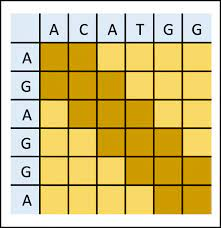

The main idea behind banded alignment is that for closely related sequences, the optimal alignment is likely to be found within a small deviation from the main diagonal. By limiting the search space to a narrow band, we can significantly reduce the computational complexity while still finding an optimal alignment for similar sequences.

In the banded Needleman-Wunsch algorithm, a parameter `k` is introduced to define the half-width of the band on each side of the main diagonal. The band width, therefore, is `2k + 1`. The algorithm only computes and fills the scoring matrix within this band, ignoring the remaining cells.

For instance if you had two loops in your code, one for the sequence A and one for sequence B, you'll adjust the range of one of your loops (B) so that it only iterates at a distance K from the diagonal of your scoring matrix.

The rest of the banded Needleman-Wunsch algorithm follows the same steps as the original algorithm, including initialization and matrix filling. The only difference is that the computations are restricted to the band, which may cause the algorithm to miss the optimal alignment for sequences with a high degree of divergence.

In summary, banded alignment for Needleman-Wunsch provides a more efficient way to find the optimal alignment for closely related sequences by limiting the search space to a diagonal band within the scoring matrix. This approach reduces computation time and memory usage, but may not be suitable for aligning highly divergent sequences.


#### 2.1. Input:

Extend the input functionality to accept an additional parameter specifying the radius of the band (k).
#### 2.2. Banded Alignment Algorithm:

Modify the code, but **copy and rename the function**, from the dynamic programming algorithm in Part 1 to restrict the search space to a diagonal band of width 2k+1 (k up and down from the current position).
Update the scoring matrix to only consider cells within the range of the band. It's best to initialize your banded matrix to ```float('-inf')``` at the beginning, so that when our band is too narrow you end up with 
```-inf``` scores for 

#### 2.3. Output:

Display the optimal banded alignment(s) and their scores. Output ```float('-inf')``` when the result cannot be computed. When can a bandwidth result not be computed? Think a little bit about the sizes of the two
strings; **what differences would not allow you to compute a banded alignment?**


In [ ]:
import numpy as np

def banded_needleman_wunsch(seq1, seq2, match, mismatch, gap_cost, k):
    
    # banded approach here!
    
    return(scoring_matrix[n,m])

# an easy test case from above... can we still solve it?
banded_needleman_wunsch('ACGCATCA','ACTGATTCA',2,-1,-2,3)

### For fun

One thing you might be curious about is how much this banded approach speeds 
up the alignment function, and 
when it can't find the right solution. The block of code below allows you to time and
test your two implementations against each other.

In [52]:
import time # we'll use this for some timing example below


# a gap of length 10 between the sequences
test_seq1 = "GCCTGCAGGAGCGCTCGACCCCCCTGAGTTCATACTTTTG"
test_seq2 = "AGGAGAGGGCAGGCAAATGTAGCTCTTGTGGAAGAGACCTCATTGCTGTT"

def test_BF_read_mapping_time():
    match = 2
    mismatch = -1
    gap_cost = -2
    
    # Test the basic NW algo.
    start_time = time.time()
    true_score = 0
    for i in range(0,1000):
        true_score = needleman_wunsch(test_seq1, test_seq2, match, mismatch, gap_cost)
    end_time = time.time()
    print('Total non-banded NW time:', end_time - start_time, 'seconds, score:',true_score,'\n')

    # Test the banded NW algo.
    for k in range(20,0,-2):
        test_score = 0
        start_time = time.time()

        for i in range(0,1000):
            test_score = banded_needleman_wunsch(test_seq1, test_seq2, match, mismatch, gap_cost,k)
        end_time = time.time()
        print('Total banded NW time for k =',k,':', end_time - start_time, 'seconds, score:',test_score)

    
test_BF_read_mapping_time()

Total non-banded NW time: 2.4318509101867676 seconds, score: 3 

Total banded NW time for k = 20 : 1.743920087814331 seconds, score: 3.0
Total banded NW time for k = 18 : 1.6249299049377441 seconds, score: 3.0
Total banded NW time for k = 16 : 1.4775817394256592 seconds, score: 3.0
Total banded NW time for k = 14 : 1.3148670196533203 seconds, score: 3.0
Total banded NW time for k = 12 : 1.1467249393463135 seconds, score: 3.0
Total banded NW time for k = 10 : 0.00032401084899902344 seconds, score: -inf
Total banded NW time for k = 8 : 0.0003108978271484375 seconds, score: -inf
Total banded NW time for k = 6 : 0.0003299713134765625 seconds, score: -inf
Total banded NW time for k = 4 : 0.0002989768981933594 seconds, score: -inf
Total banded NW time for k = 2 : 0.0002980232238769531 seconds, score: -inf


#### Timing results

It's worth asking a few quick things about the output above: why are some answers -inf (negative infinity)? Why do some low k-values run so fast; are we even running them at all? If not, why not? You don't have to answer these questions for credit, they exist only to help you with the assignment.